In [1]:
!git clone https://github.com/AshishJangra27/datasets

Cloning into 'datasets'...
remote: Enumerating objects: 328, done.
remote: Counting objects: 100% (93/93), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 328 (delta 19), reused 54 (delta 9), pack-reused 235 (from 1)
Receiving objects: 100% (328/328), 278.62 MiB | 14.63 MiB/s, done.
Resolving deltas: 100% (145/145), done.
Updating files: 100% (225/225), done.


In [54]:
import pandas as pd

df = pd.read_csv('/content/datasets/Gaana/songs.csv')

df.head()

,name,singer,singer_id,duration,link,language
0,Dil - E - Nadan Tujhe,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,05:00,/dil-e-nadan-tujhe-3,Urdu
1,Agar Hum Kahen Aur Woh Muskara De,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,06:26,/agar-hum-kahen-aur-woh-muskura-den,Urdu
2,Unke Dekhe Se,Jagjit Singh,/artist/jagjeet-singh-1,03:41,/unke-dekhe-se,Urdu
3,Yeh Na Thi Hamari Qismat - Chitra Singh,Chitra Singh,/artist/chitra-singh,04:26,/yeh-na-thi-hamari-qismat-2,Urdu
4,Hazaron Khwahishen Aisi,Jagjit Singh,/artist/jagjeet-singh-1,05:39,/hazaron-khwahishen-aisi-1,Urdu


### 1. Exploring the Data

#### 1.1) Checking Null Values

In [55]:
df.isnull().sum()

,0
name,0
singer,0
singer_id,0
duration,0
link,0
language,0


#### 1.2) Checking Duplicates

In [56]:
df[df.duplicated('link')]['language'].value_counts()

,count
language,
Old,4993
Telugu,1


#### 1.3) Removing Duplicates

In [57]:
df.drop_duplicates(subset = 'link',inplace = True)

36360

#### 1.4) Finding No of Singers Collaborated

In [79]:
df['no_of_singers'] = df['singer'].str.split('|').str.len()

#### 1.5) Creating Duration Column

In [111]:
duration = []

for i in df['duration']:

  if len(i.split(':')) == 2:                # '05:10'
      mints = int(i.split(":")[0])
      secds = int(i.split(":")[1])
      duration.append(mints*60 + secds)

  else:                                     # '03:05:23'
      hours = int(i.split(":")[0])
      mints = int(i.split(":")[1])
      secds = int(i.split(":")[2])
      duration.append(hours * 3600 + mints*60 + secds)

df['duration_in_seconds'] = duration

df.head()

,name,singer,singer_id,duration,link,language,no_of_singers,duration_in_seconds
0,Dil - E - Nadan Tujhe,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,05:00,/dil-e-nadan-tujhe-3,Urdu,2,300
1,Agar Hum Kahen Aur Woh Muskara De,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,06:26,/agar-hum-kahen-aur-woh-muskura-den,Urdu,2,386
2,Unke Dekhe Se,Jagjit Singh,/artist/jagjeet-singh-1,03:41,/unke-dekhe-se,Urdu,1,221
3,Yeh Na Thi Hamari Qismat - Chitra Singh,Chitra Singh,/artist/chitra-singh,04:26,/yeh-na-thi-hamari-qismat-2,Urdu,1,266
4,Hazaron Khwahishen Aisi,Jagjit Singh,/artist/jagjeet-singh-1,05:39,/hazaron-khwahishen-aisi-1,Urdu,1,339


In [109]:
# 1. Number of Songs in Hindi | 4993

print(len(df[df['language'] == 'Hindi']))

# 2. Singles by Jagjit Singh
print(len(df[df['singer'] == 'Jagjit Singh']))

# 3. Total Unique Songs
print(df['link'].nunique())

# 4. Language with maximum songs
print(df['language'].value_counts().sort_values(ascending = False).head(1).index[0])

# 5. Singer with Maximum Solo
print(df['singer'].value_counts().idxmax())

# 6. Solo Urdu songs by Jagjit Singh
print(len(df[(df['language'] == 'Urdu') & (df['singer'] == 'Jagjit Singh')]))

# 7. Total Songs of Jagjit Singh
print((df['singer_id'].str.split('|').explode() == '/artist/jagjeet-singh-1').sum())

# 8. Singer with Maximum Songs in Total
print(df['singer_id'].str.split('|').explode().value_counts().head())

# 9. Song with Maximum Singers Collaborated
print(df.sort_values(by = 'no_of_singers',ascending = False).head(1))

# 10. Language with Maximum average song length

4993
120
36360
Telugu
S. P. Balasubrahmanyam
40
184
singer_id
/artist/s-p-balasubrahamanyam    3617
/artist/p-suseela-2              3212
/artist/s-janaki                 2193
/artist/asha-bhosle-1            1981
/artist/lata-mangeshkar          1726
Name: count, dtype: int64
                                          name  \
41048  Neel Kamal Lal Kamal - Thakurmaar Jhuli   

                                                  singer  \
41048  Asha Devi|Kazi Sabyasachi|Lalita Dhar Chowdhur...   

                                               singer_id duration  \
41048  /artist/asha-devi|/artist/kazi-sabyasachi|/art...    18:41   

                         link language  no_of_singers  
41048  /neel-kamal-laal-kamal  Bengali             25  


<Axes: xlabel='language'>

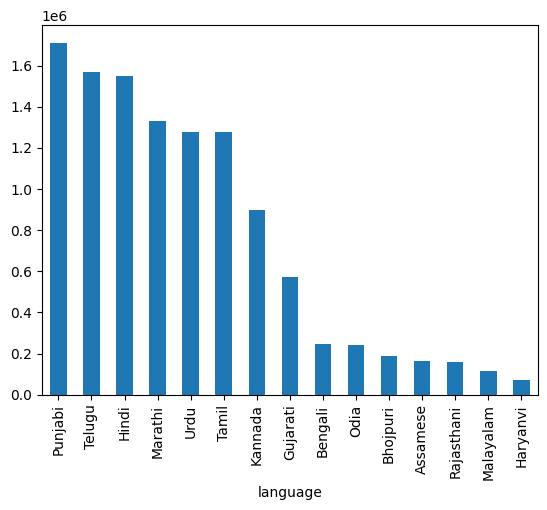

In [119]:
df.groupby('language')['duration_in_seconds'].sum().sort_values(ascending = False).plot(kind = 'bar')

<Axes: xlabel='language'>

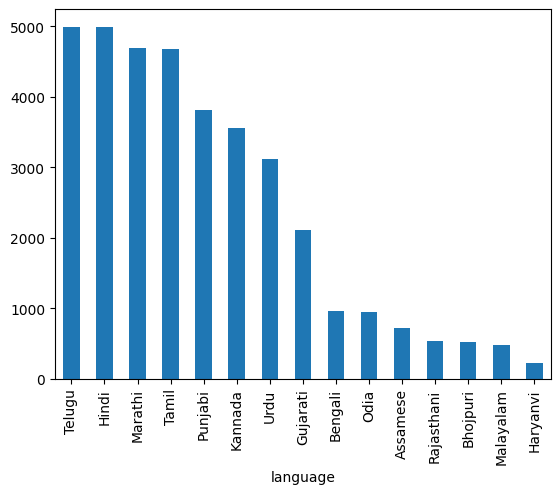

In [116]:
df['language'].value_counts().sort_values(ascending = False).plot(kind = 'bar')

In [120]:
df = pd.read_csv('/content/datasets/Airbnb/airbnb_v2.csv')
df.head()

,Unnamed: 0,id,name,rating,reviews,host_name,host_id,address,features,amenities,...,price,country,bathrooms,beds,guests,toiles,bedrooms,studios,checkin,checkout
0,0,49849504,Perla bungalov,4.71,64,Mehmetcan,357334205.0,"Kartepe, Kocaeli, Turkey","2 guests,2 bedrooms,1 bed,1 bathroom","Mountain view,Valley view,Lake access,Kitchen,...",...,8078,Turkey,1,1,2,0,2,0,Flexible,12 00 pm
1,1,50891766,Authentic Beach Architect Sheltered Villa with...,New,0,Fatih,386223873.0,"Kaş, Antalya, Turkey","4 guests,2 bedrooms,2 beds,2 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...",...,4665,Turkey,2,2,4,0,2,0,4 00 pm - 11 00 pm,10 00 am
2,2,50699164,cottages sataplia,4.85,68,Giorgi,409690853.0,"Imereti, Georgia","4 guests,1 bedroom,3 beds,1 bathroom","Mountain view,Kitchen,Wifi,Dedicated workspace...",...,5991,Georgia,1,3,4,0,1,0,After 1 00 pm,12 00 pm
3,3,49871422,Sapanca Breathable Bungalow,5.0,13,Melih,401873242.0,"Sapanca, Sakarya, Turkey","4 guests,1 bedroom,2 beds,1 bathroom","Mountain view,Valley view,Kitchen,Wifi,Free pa...",...,11339,Turkey,1,2,4,0,1,0,After 2 00 pm,12 00 pm
4,4,51245886,Bungalov Ev 2,New,0,Arp Sapanca,414884116.0,"Sapanca, Sakarya, Turkey","2 guests,1 bedroom,1 bed,1 bathroom","Kitchen,Wifi,Free parking on premises,TV,Air c...",...,6673,Turkey,1,1,2,0,1,0,After 2 00 pm,12 00 pm


In [121]:
df.columns

Index(['Unnamed: 0', 'id', 'name', 'rating', 'reviews', 'host_name', 'host_id',
       'address', 'features', 'amenities', 'safety_rules', 'hourse_rules',
       'img_links', 'price', 'country', 'bathrooms', 'beds', 'guests',
       'toiles', 'bedrooms', 'studios', 'checkin', 'checkout'],
      dtype='object')

In [100]:
df['singer'].str.split('|').explode().nunique()

3940

In [ ]:
# 1. Average Price of an Airbnb in every country
df.groupby('country')['price'].mean().sort_values(ascending = False)

# 2. Top 10 Countries with Maxium Number of Airbnbs | India - 2779


# 3. Host with Maximum number of Airbnbs Listed | 28



# 4. Most Popular Country to host an Airbnb




In [129]:
df[df['host_id'] == 157378426.0]

,Unnamed: 0,id,name,rating,reviews,host_name,host_id,address,features,amenities,...,price,country,bathrooms,beds,guests,toiles,bedrooms,studios,checkin,checkout
1190,1190,601816645157829673,Stone Cottage,4.6,5,Shanu,157378426.0,"Jibhi, Himachal Pradesh, India","4 guests,1 bedroom,2 beds,1 bathroom","Kitchen,Wifi,Dedicated workspace,Free on-stree...",...,2852,India,1,2,4,0,1,0,12 00 pm - 10 00 pm,11 00 am
1544,1544,628897626500350545,Blissful cottage in the woods| Tandi,New,2,Shanu,157378426.0,"Tandi, Himachal Pradesh, India","2 guests,1 bedroom,1 bed,1 bathroom","Kitchen,Wifi,Dedicated workspace,Free parking ...",...,4564,India,1,1,2,0,1,0,12 00 pm - 10 00 pm,11 00 am
1557,1557,45644216,Beautiful Sunny Cottage|250 meter Trek| Jibhi,4.85,41,Shanu,157378426.0,"Jibhi, Himachal Pradesh, India","6 guests,2 bedrooms,3 beds,1 bathroom","Waterfront,Wifi,Dedicated workspace,Free on-st...",...,2281,India,1,3,6,0,2,0,12 00 pm - 10 00 pm,11 00 am
1561,1561,636631343388002719,Entire cottage with a room & attic in Tandi,New,1,Shanu,157378426.0,"Jibhi, Himachal Pradesh, India","4 guests,1 bedroom,1 bed,1 bathroom","Wifi,Dedicated workspace,Free parking on premi...",...,2853,India,1,1,4,0,1,0,12 00 pm - 10 00 pm,11 00 am
1571,1571,614293947503916670,Wooden hut with the Valley view in jibhi,New,2,Shanu,157378426.0,"Jibhi, Himachal Pradesh, India","4 guests,1 bedroom,1 bed,1 bathroom","Kitchen,Wifi,Dedicated workspace,Free parking ...",...,2281,India,1,1,4,0,1,0,12 00 pm - 10 00 pm,11 00 am
1614,1614,616569469785545211,Peaceful Haven in an Apple Orchard,New,1,Shanu,157378426.0,"Jibhi, Himachal Pradesh, India","4 guests,1 bedroom,1 bed,1 bathroom","Waterfront,Wifi,Dedicated workspace,Free parki...",...,3422,India,1,1,4,0,1,0,12 00 pm - 10 00 pm,11 00 am
3080,3080,52505611,A Mudhouse In A Resort| Chhet,New,0,Shanu,157378426.0,"Banjar, Himachal Pradesh, India","4 guests,1 bedroom,1 bed,1 bathroom","Dedicated workspace,Free parking on premises,P...",...,5705,India,1,1,4,0,1,0,12 00 pm - 10 00 pm,NaN
3142,3142,52162851,Vibrant Room In A Beautiful Cottage| Hatu Peak,New,0,Shanu,157378426.0,"Narkanda, Himachal Pradesh, India","5 guests,1 bedroom,2 beds,1 shared bathroom","Kitchen,Wifi,Dedicated workspace,Free parking ...",...,5706,India,1,2,5,0,1,0,12 00 pm - 10 00 pm,11 00 am
5276,5276,578733555164036351,Magnificent Treehouse with Valley View| Tandi,4.73,11,Shanu,157378426.0,"Jibhi, Himachal Pradesh, India","3 guests,1 bedroom,2 beds,1 bathroom","Kitchen,Wifi,Dedicated workspace,Free parking ...",...,3422,India,1,2,3,0,1,0,12 00 pm - 10 00 pm,11 00 am
5284,5284,669002665572906395,Picturesque Treehouse | Tandi,New,0,Shanu,157378426.0,"Tandi, Himachal Pradesh, India","4 guests,1 bedroom,2 beds,1 bathroom","Kitchen,Wifi,Dedicated workspace,Free parking ...",...,4564,India,1,2,4,0,1,0,After 12 00 pm,NaN


In [105]:
df

,name,singer,singer_id,duration,link,language,no_of_singers
0,Dil - E - Nadan Tujhe,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,05:00,/dil-e-nadan-tujhe-3,Urdu,2
1,Agar Hum Kahen Aur Woh Muskara De,Chitra Singh|Jagjit Singh,/artist/chitra-singh|/artist/jagjeet-singh-1,06:26,/agar-hum-kahen-aur-woh-muskura-den,Urdu,2
2,Unke Dekhe Se,Jagjit Singh,/artist/jagjeet-singh-1,03:41,/unke-dekhe-se,Urdu,1
3,Yeh Na Thi Hamari Qismat - Chitra Singh,Chitra Singh,/artist/chitra-singh,04:26,/yeh-na-thi-hamari-qismat-2,Urdu,1
4,Hazaron Khwahishen Aisi,Jagjit Singh,/artist/jagjeet-singh-1,05:39,/hazaron-khwahishen-aisi-1,Urdu,1
...,...,...,...,...,...,...,...
41350,Chaaridike Paaper Andhar (Manush Janam Diye Bi...,Kishore Kumar,/artist/kishore-kumar,03:23,/chaaridike-paaper-andhar-manush-janam-diye-bidhi,Bengali,1
41351,Ei Ki Go Shesh Daan,Feroza Begum,/artist/feroza-begum,03:56,/ei-kigo-sesh-daan,Bengali,1
41352,Ei Je Bangla,Sandhya Mukherjee|Hemant Kumar,/artist/sandhya-mukherjee|/artist/hemanta-mukh...,07:36,/ei-je-bangla,Bengali,2
41353,Jatone Hridaye Rekho,Ajoy Chakrabarty,/artist/ajoy-chakrabarty,04:29,/jatone-hridaye-rekho,Bengali,1


In [136]:
del df['checkin']
del df['checkout']
del df['Unnamed: 0']

In [141]:
df_1 = pd.read_csv('/content/datasets/Airbnb/airbnb_v2.csv')
df_1.head()

,Unnamed: 0,id,name,rating,reviews,host_name,host_id,address,features,amenities,...,price,country,bathrooms,beds,guests,toiles,bedrooms,studios,checkin,checkout
0,0,49849504,Perla bungalov,4.71,64,Mehmetcan,357334205.0,"Kartepe, Kocaeli, Turkey","2 guests,2 bedrooms,1 bed,1 bathroom","Mountain view,Valley view,Lake access,Kitchen,...",...,8078,Turkey,1,1,2,0,2,0,Flexible,12 00 pm
1,1,50891766,Authentic Beach Architect Sheltered Villa with...,New,0,Fatih,386223873.0,"Kaş, Antalya, Turkey","4 guests,2 bedrooms,2 beds,2 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...",...,4665,Turkey,2,2,4,0,2,0,4 00 pm - 11 00 pm,10 00 am
2,2,50699164,cottages sataplia,4.85,68,Giorgi,409690853.0,"Imereti, Georgia","4 guests,1 bedroom,3 beds,1 bathroom","Mountain view,Kitchen,Wifi,Dedicated workspace...",...,5991,Georgia,1,3,4,0,1,0,After 1 00 pm,12 00 pm
3,3,49871422,Sapanca Breathable Bungalow,5.0,13,Melih,401873242.0,"Sapanca, Sakarya, Turkey","4 guests,1 bedroom,2 beds,1 bathroom","Mountain view,Valley view,Kitchen,Wifi,Free pa...",...,11339,Turkey,1,2,4,0,1,0,After 2 00 pm,12 00 pm
4,4,51245886,Bungalov Ev 2,New,0,Arp Sapanca,414884116.0,"Sapanca, Sakarya, Turkey","2 guests,1 bedroom,1 bed,1 bathroom","Kitchen,Wifi,Free parking on premises,TV,Air c...",...,6673,Turkey,1,1,2,0,1,0,After 2 00 pm,12 00 pm


In [142]:
df_2 = pd.read_csv('/content/datasets/Airbnb/airbnb.csv')
df_2.head()

,id,name,rating,reviews,host_name,host_id,address,features,amenities,safety_rules,hourse_rules,img_links,price
0,49849504,Perla bungalov,4.71,64,Entire bungalow hosted by Mehmetcan,357334205.0,"Kartepe, Kocaeli, Turkey","2 guests,2 bedrooms,1 bed,1 bathroom","Mountain view,Valley view,Lake access,Kitchen,...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: Flexible,Check out: 12:00 pm,Pets ar...",https://a0.muscache.com/im/pictures/a5da5cb7-c...,"₹8,078 per night"
1,50891766,Authentic Beach Architect Sheltered Villa with...,New,NaN,Entire villa hosted by Fatih,386223873.0,"Kaş, Antalya, Turkey","4 guests,2 bedrooms,2 beds,2 bathrooms","Kitchen,Wifi,Dedicated workspace,Free parking ...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: 4:00 pm - 11:00 pm,Check out: 10:00 ...",https://a0.muscache.com/im/pictures/61b70855-2...,"₹4,665 per night"
2,50699164,cottages sataplia,4.85,68,Entire cabin hosted by Giorgi,409690853.0,"Imereti, Georgia","4 guests,1 bedroom,3 beds,1 bathroom","Mountain view,Kitchen,Wifi,Dedicated workspace...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: After 1:00 pm,Check out: 12:00 pm,Se...",https://a0.muscache.com/im/pictures/miso/Hosti...,"₹5,991 per night"
3,49871422,Sapanca Breathable Bungalow,5.0,13,Entire bungalow hosted by Melih,401873242.0,"Sapanca, Sakarya, Turkey","4 guests,1 bedroom,2 beds,1 bathroom","Mountain view,Valley view,Kitchen,Wifi,Free pa...","󹀁,Airbnb's COVID-19 safety practices apply,󱠃,N...","Check-in: After 2:00 pm,Check out: 12:00 pm,No...",https://a0.muscache.com/im/pictures/72e6396e-e...,"₹11,339 per night"
4,51245886,Bungalov Ev 2,New,NaN,Entire bungalow hosted by Arp Sapanca,414884116.0,"Sapanca, Sakarya, Turkey","2 guests,1 bedroom,1 bed,1 bathroom","Kitchen,Wifi,Free parking on premises,TV,Air c...","󹀁,Airbnb's COVID-19 safety practices apply,󱠆,C...","Check-in: After 2:00 pm,Check out: 12:00 pm,No...",https://a0.muscache.com/im/pictures/73973308-e...,"₹6,673 per night"


In [145]:
# 1.

'Check-in: 4:00 pm - 11:00 pm,Check out: 10:00 am,No smoking,No pets,No parties or events'

In [140]:
df.isnull().sum()

,0
id,0
name,0
rating,0
reviews,0
host_name,0
host_id,0
address,0
features,0
amenities,0
safety_rules,0


In [10]:
df.loc[0]

,0
name,Dil - E - Nadan Tujhe
singer,Chitra Singh|Jagjit Singh
singer_id,/artist/chitra-singh|/artist/jagjeet-singh-1
duration,05:00
link,/dil-e-nadan-tujhe-3
language,Urdu


In [ ]:
df